<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/16_1_%ED%8C%8C%EC%9D%BC%EC%97%90%EC%84%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%9D%BD%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파일에서 이미지 읽어서 학습하기

https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [ ]:
import glob
roses = list(glob.glob(data_dir+'/roses/*.*')) #폴더 내의 파일(경로포함) 가져오기

In [ ]:
roses

['/root/.keras/datasets/flower_photos/roses/14414117598_cf70df30de.jpg',
 '/root/.keras/datasets/flower_photos/roses/15822837396_96b392fda8_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/5570018782_c56bee942f.jpg',
 '/root/.keras/datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/5398569540_7d134c42cb_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/16258946661_f9739cdc0a.jpg',
 '/root/.keras/datasets/flower_photos/roses/7186509956_c37c02fb43_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/3412874275_ca78ee024d_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/1756973583_4aac7df00d_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/5050969148_a0090f762a.jpg',
 '/root/.keras/datasets/flower_photos/roses/3268459296_a7346c6b2c.jpg',
 '/root/.keras/datasets/flower_photos/roses/4921988677_e2eb0c9a24_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/2536282942_b5ca27577e.jpg',
 '/root/.keras/datasets/flower_photos/roses/36

In [ ]:
import cv2
img = cv2.imread(str(roses[0])) 

In [ ]:
img

array([[[ 13,  38,  54],
        [ 12,  37,  53],
        [ 14,  39,  55],
        ...,
        [ 78,  93, 162],
        [ 78,  93, 162],
        [ 78,  93, 162]],

       [[ 13,  39,  53],
        [ 11,  36,  52],
        [ 13,  38,  54],
        ...,
        [ 77,  94, 161],
        [ 77,  94, 161],
        [ 77,  94, 161]],

       [[ 17,  40,  55],
        [ 13,  38,  54],
        [ 13,  38,  54],
        ...,
        [ 75,  94, 161],
        [ 75,  94, 161],
        [ 75,  94, 161]],

       ...,

       [[ 13,  39,  53],
        [ 14,  40,  54],
        [ 13,  39,  53],
        ...,
        [ 67,  90, 128],
        [ 68,  92, 128],
        [ 70,  94, 130]],

       [[ 13,  39,  53],
        [ 13,  39,  53],
        [ 13,  39,  53],
        ...,
        [ 70,  93, 131],
        [ 72,  95, 133],
        [ 73,  96, 134]],

       [[ 13,  38,  54],
        [ 12,  38,  52],
        [ 13,  39,  53],
        ...,
        [ 72,  95, 133],
        [ 74,  97, 135],
        [ 78,  98, 139]]

In [ ]:
img.shape

(333, 500, 3)

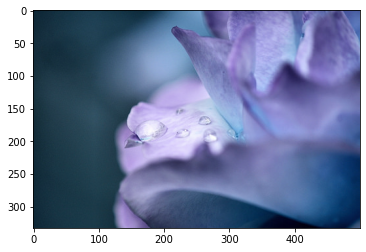

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img_height = 180
img_width = 180

옵션 참고

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)  
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
for images, labels in train_ds.take(1):  #특정 데이터만 가져오기, batch_size가 기본 단위가 됨
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [ ]:
numpy_images.shape 

(32, 180, 180, 3)

In [ ]:
numpy_images[0,:,:,0]

array([[ 88.388885,  88.92778 ,  88.83426 , ..., 214.58    , 233.40553 ,
        228.70369 ],
       [ 90.27778 ,  90.86666 ,  95.05278 , ..., 161.44466 , 172.70831 ,
        153.86942 ],
       [ 93.02778 ,  92.75    ,  98.35185 , ..., 118.51407 , 167.69493 ,
        226.2223  ],
       ...,
       [ 80.000046,  85.55552 ,  52.20364 , ...,  72.578674,  83.51386 ,
         82.486145],
       [ 87.0027  ,  74.35784 ,  51.033665, ...,  62.094765,  63.58307 ,
         67.524635],
       [ 78.089745,  50.811035,  60.286087, ...,  83.64515 ,  52.94985 ,
         54.28519 ]], dtype=float32)

In [ ]:
numpy_labels

array([3, 3, 4, 4, 1, 3, 4, 3, 4, 4, 1, 3, 0, 0, 2, 4, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 4, 1, 4, 4, 4, 3], dtype=int32)

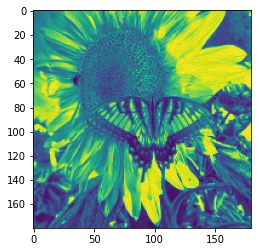

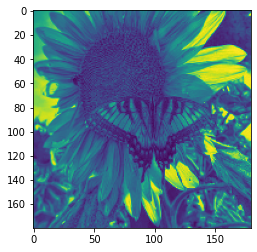

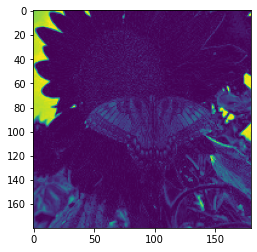

In [ ]:
plt.figure()
plt.imshow(numpy_images[0,:,:,0]) #
plt.show()

plt.figure()
plt.imshow(numpy_images[0,:,:,1])
plt.show()

plt.figure()
plt.imshow(numpy_images[0,:,:,2])
plt.show()

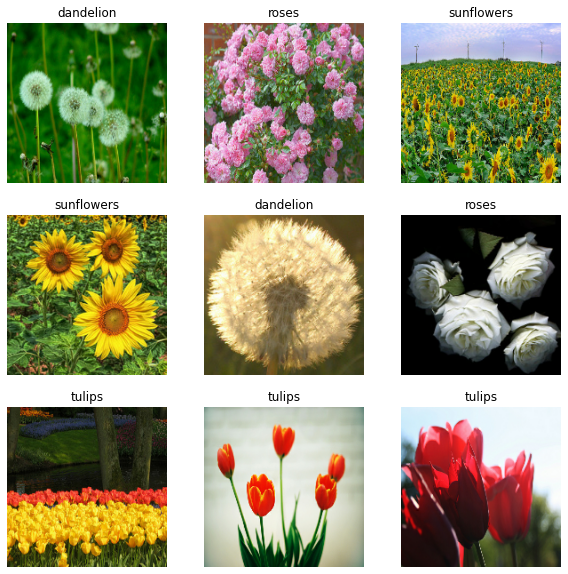

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("int"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers

In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 [==============================] - 9s 100ms/step - loss: 1.2920 - accuracy: 0.4510 - val_loss: 1.1110 - val_accuracy: 0.5327
Epoch 2/10
92/92 [==============================] - 9s 94ms/step - loss: 1.0512 - accuracy: 0.5712 - val_loss: 1.0980 - val_accuracy: 0.5545
Epoch 3/10
92/92 [==============================] - 9s 98ms/step - loss: 0.9246 - accuracy: 0.6413 - val_loss: 0.9413 - val_accuracy: 0.6390
Epoch 4/10
92/92 [==============================] - 9s 98ms/step - loss: 0.7861 - accuracy: 0.7057 - val_loss: 0.9621 - val_accuracy: 0.6090
Epoch 5/10
92/92 [==============================] - 9s 95ms/step - loss: 0.6578 - accuracy: 0.7503 - val_loss: 0.8934 - val_accuracy: 0.6608
Epoch 6/10
92/92 [==============================] - 9s 95ms/step - loss: 0.5164 - accuracy: 0.8106 - val_loss: 0.9845 - val_accuracy: 0.6444
Epoch 7/10
92/92 [==============================] - 9s 95ms/step - loss: 0.3799 - accuracy: 0.8692 - val_loss: 1.0431 - val_accuracy: 0.6294
Epoch 8/10
9

In [ ]:
model.predict(val_ds)

array([[ -9.008682  , -15.135861  ,  12.465254  , -22.590614  ,
         23.315899  ],
       [ -0.11970702,  -5.348603  ,  -1.8893394 ,   0.3217154 ,
          3.42386   ],
       [ -0.05133375,   4.910329  ,   1.7538161 ,   1.6900134 ,
         -1.5723494 ],
       ...,
       [ -4.887128  ,   1.9169499 ,   3.8692095 ,  -8.378243  ,
          8.170274  ],
       [-10.229486  ,   2.4271863 ,  -6.545987  ,  11.69695   ,
         -0.86231345],
       [ -4.4036207 , -12.366961  ,  12.901306  , -12.519876  ,
          6.1981306 ]], dtype=float32)

Numpy로 가지고 있는 경우

In [ ]:
img = numpy_images[:10,:,:,:]
pred_y=model.predict(img)

In [ ]:
pred_y.shape

(10, 5)

In [ ]:
pred_y

array([[-12.2619    ,  -1.2965728 ,  -3.969775  ,  11.188571  ,
          1.4625803 ],
       [ -3.812897  ,   1.604093  ,  -8.438231  ,   6.208684  ,
         -5.936407  ],
       [  1.4910179 ,  -8.095316  ,  -0.08551862,  -0.6269607 ,
         11.191749  ],
       [  0.25263408,  -2.2037363 ,  -0.06643947,  -0.7635426 ,
          5.5996842 ],
       [ -3.092336  ,   8.033005  ,  -5.025314  ,  -5.8345847 ,
         -4.6300907 ],
       [ -9.472183  , -30.777496  ,   9.642723  ,   5.288065  ,
          3.6787217 ],
       [ -1.887856  ,  -8.297775  ,   4.9803863 ,  -6.120611  ,
          9.867661  ],
       [-11.391658  ,  -7.444676  ,  -4.249213  ,  13.344251  ,
          3.0604398 ],
       [ -6.39432   ,  -5.984869  ,   7.408414  ,  -8.82517   ,
          8.222308  ],
       [ -2.1860778 ,  -0.55971897,   0.2805778 ,  -0.8036077 ,
          3.879688  ]], dtype=float32)

In [ ]:
pred_labels = pred_y.argmax(axis=1)

In [ ]:
pred_labels

array([3, 3, 4, 4, 1, 2, 4, 3, 4, 4])

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
pred_labels = [class_names[x] for x in pred_labels]

In [ ]:
pred_labels

['sunflowers',
 'sunflowers',
 'tulips',
 'tulips',
 'dandelion',
 'roses',
 'tulips',
 'sunflowers',
 'tulips',
 'tulips']

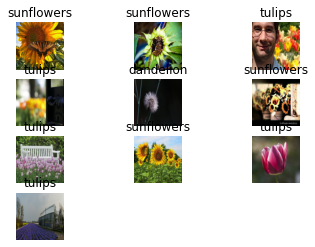

In [ ]:
for i in range(10):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(numpy_images[i].astype("int"))
  plt.title(class_names[numpy_labels[i]])
  plt.axis("off")